<h1><div align="center">Timeseries</div></h1>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves</div>
<!--h2 align="center", style="font-size=150%">Part I</h2-->

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
np.random.seed(123)

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib,pandas,sklearn

Tue Apr 16 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.0.3
pandas 0.24.2
sklearn 0.20.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [18]:
series = pd.read_csv('GDP.csv', header=0, parse_dates=[0], index_col=0)

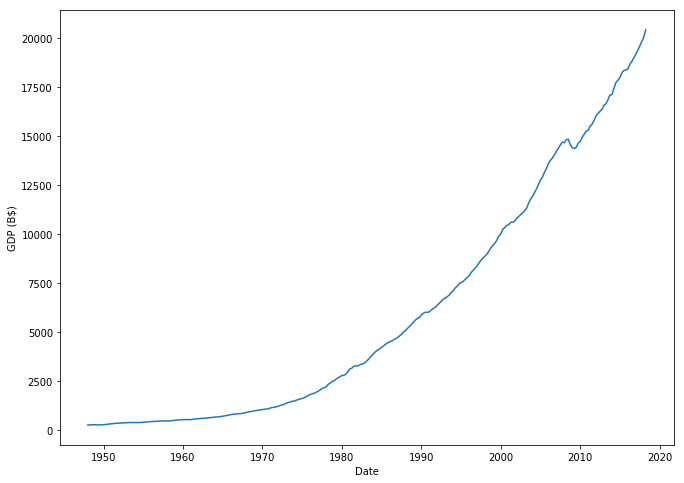

In [19]:
plt.plot(series)
plt.xlabel('Date')
plt.ylabel('GDP (B$)');
plt.gcf().set_size_inches(11,8)

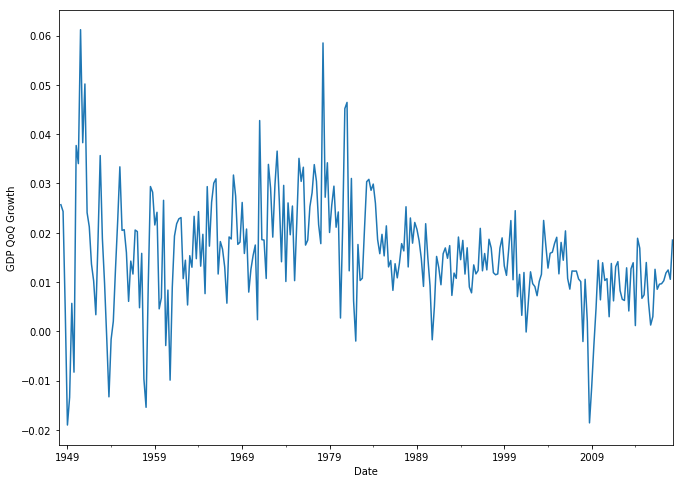

In [21]:
series['GDP'].pct_change().plot()
plt.gca().plot([series.index.min(), series.index.max()], [0, 0], 'r-')
plt.xlabel('Date')
plt.ylabel('GDP QoQ Growth');
plt.gcf().set_size_inches(11,8)

## Autocorrelation function

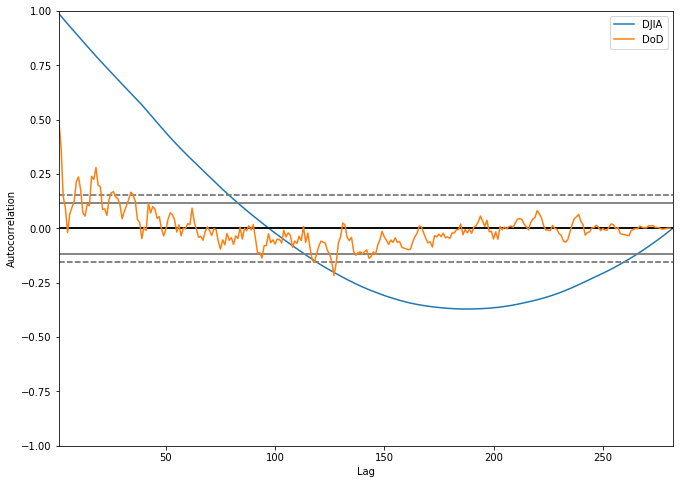

In [22]:
autocorrelation_plot(series, label='DJIA')
autocorrelation_plot(series.pct_change().dropna(), ax=plt.gca(), label='DoD')
plt.gcf().set_size_inches(11,8)

In [23]:
values = series.pct_change().dropna().values.reshape(-1, 1)
X = values[:-1]
y = values[1:]

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred = lm.predict(X)

## Fit comparison

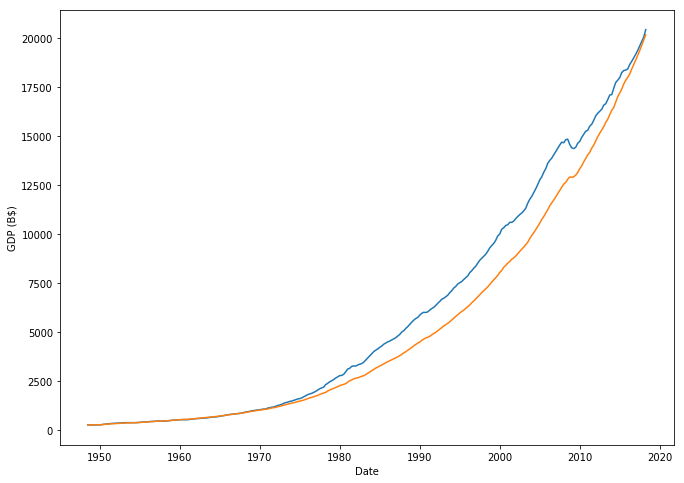

In [28]:
plt.plot(series.index[2:], series.values[2:], )
plt.plot(series.index[2:], (1+y_pred).cumprod()*series.values[0])
plt.xlabel('Date')
plt.ylabel('GDP (B$)')
plt.gcf().set_size_inches(11, 8)

## Now without looking into the future

In [29]:
n_points = len(series)
train_points = int(2/3*n_points)+1

In [30]:
X_train = X[:train_points]
y_train = y[:train_points]
X_test = X[train_points:]
y_test = y[train_points:]

In [31]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

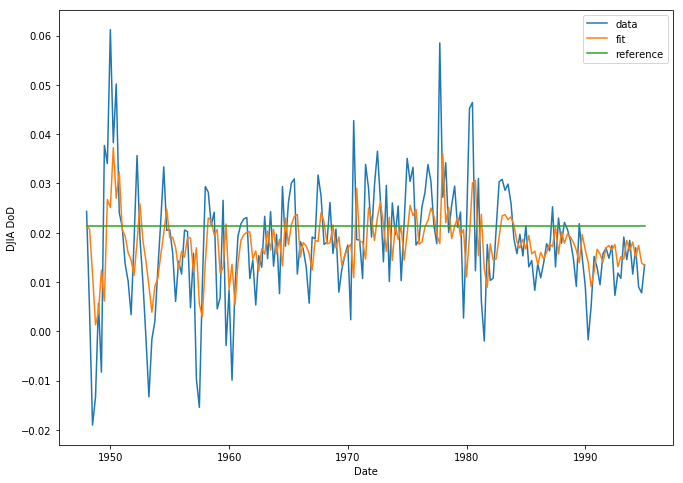

In [33]:
plt.plot(series.index[:train_points], y_train, label='data')
plt.plot(series.index[:train_points], y_train_pred, label='fit')
plt.plot(series.index[:train_points], y_train_pred*0+y_train_pred[0], label='reference')
plt.xlabel('Date')
plt.ylabel('DJIA DoD')
plt.legend()
plt.gcf().set_size_inches(11, 8)

## Comparison plot

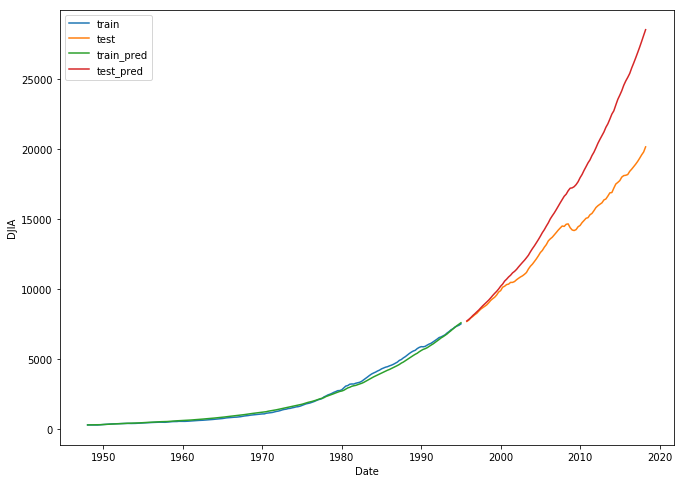

In [34]:
plt.plot(series.index[:train_points], (1+y_train).cumprod()*series.values[0], label='train')
plt.plot(series.index[train_points+2:], (1+y_test).cumprod()*series.values[train_points], label='test')
plt.plot(series.index[:train_points], (1+y_train_pred).cumprod()*series.values[0], label='train_pred')
plt.plot(series.index[train_points+2:], (1+y_test_pred).cumprod()*series.values[train_points], label='test_pred')
plt.xlabel('Date')
plt.ylabel('DJIA')
plt.legend()
plt.gcf().set_size_inches(11,8)